In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
col_names = ['timestamp', 'street_shoe_size', 'fav_sneaker_model', 'foot_len', 'foot_width', 
             'foot_type', 'foot_deform', 'shoe_brand', 'shoe_model', 'shoe_model_manual', 'climb_shoe_size', 
             'shoe_age', 'favourite', 'vorspann', 'downturn', 'asymetry', 'closure_type', 'climb_style', 
             'terrain', 'rate_fit', 'rate_comfort', 'rate_stiffness', 'use_frequency', 'climbed_grade', 
             'overall_rating','gender','height','weight', 'age','climbing_exp']

df_survey = pd.read_csv("./data/climb_shoe_survey.csv", header=0, names=col_names)
df_survey.shape

(183, 30)

In [88]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          183 non-null    object 
 1   street_shoe_size   183 non-null    float64
 2   fav_sneaker_model  153 non-null    object 
 3   foot_len           183 non-null    float64
 4   foot_width         183 non-null    float64
 5   foot_type          183 non-null    object 
 6   foot_deform        183 non-null    object 
 7   shoe_brand         183 non-null    object 
 8   shoe_model         183 non-null    object 
 9   shoe_model_manual  8 non-null      object 
 10  climb_shoe_size    183 non-null    float64
 11  shoe_age           183 non-null    float64
 12  favourite          180 non-null    object 
 13  vorspann           183 non-null    object 
 14  downturn           183 non-null    object 
 15  asymetry           183 non-null    object 
 16  closure_type       183 non

In [89]:
df_survey.head(3)

,timestamp,street_shoe_size,fav_sneaker_model,foot_len,foot_width,foot_type,foot_deform,shoe_brand,shoe_model,shoe_model_manual,...,rate_comfort,rate_stiffness,use_frequency,climbed_grade,overall_rating,gender,height,weight,age,climbing_exp
0,24.02.2021 22:27:44,41.5,Vans Authentic,25.5,10.0,Ägyptischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,NaN,...,4,4,4,Fortgeschritten (UIAA 7 - 9),5,Männlich,168,61,29,4.0
1,25.02.2021 08:26:50,38.5,Adidas cloudfoam,24.2,9.8,Römischer Fußtyp,Hallux Valgus,La Sportiva,La Sportiva - SOLUTION COMP WOMAN,NaN,...,4,3,3,Fortgeschritten (UIAA 7 - 9),4,Weiblich,168,63,30,3.0
2,25.02.2021 10:28:25,46.0,Black Diamond Mission LT,29.0,10.0,Griechischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,NaN,...,4,5,5,Fortgeschritten (UIAA 7 - 9),5,Männlich,186,72,36,30.0


## Einblick in Demographie

Demographische Daten können dabei helfen, die Passform von Kletterschuhen besser zu verstehen. Daher wurden der Umfrage folgende Fragen zur Person hinzugefügt:

- Geschlecht
- Alter
- Körpergröße
- Gewicht
- Klettererfahrung (in Jahren)

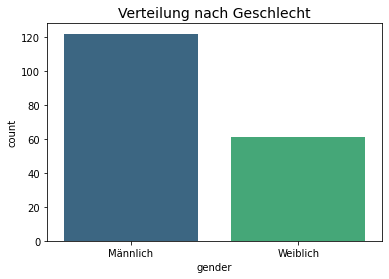

In [90]:
sns.countplot(x='gender', data=df_survey, palette='viridis')
plt.title("Verteilung nach Geschlecht", fontsize=14)
plt.show()

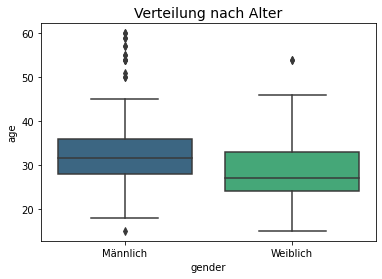

In [91]:
sns.boxplot(x='gender', y='age',data=df_survey, palette='viridis')
plt.title("Verteilung nach Alter", fontsize=14)
plt.show()

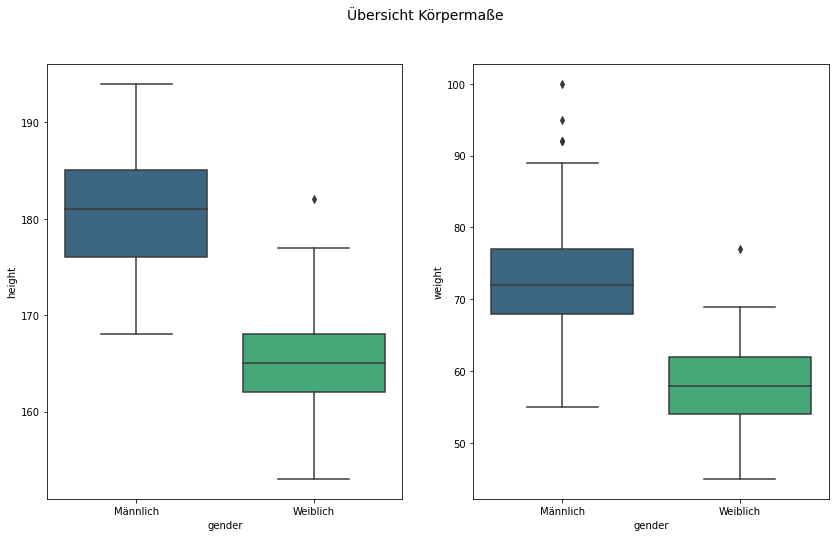

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Übersicht Körpermaße', fontsize=14)
sns.boxplot(x='gender', y='height',data=df_survey, palette='viridis', ax=axs[0])
sns.boxplot(x='gender', y='weight',data=df_survey, palette='viridis', ax=axs[1])
plt.show()

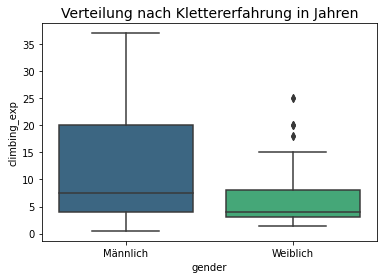

In [93]:
sns.boxplot(x='gender', y='climbing_exp',data=df_survey, palette='viridis')
plt.title("Verteilung nach Klettererfahrung in Jahren", fontsize=14)
plt.show()

## Erkenntnisse durch Fußdaten

Die Fußeigenschaften der Befragten sollen wertvolle Erkenntnisse zur Passform der Kletterschuhe liefern. Daher beruht ein großer Teil der Umfrage auf Informationen rund um den Fuß. Folgende Informationen wurden gesammelt:
- Schuhgröße(Straßen- und Kletterschuhe)
- Fußfehlstellung
- Fußtypisierung
- Fußlänge
- Fußbreite

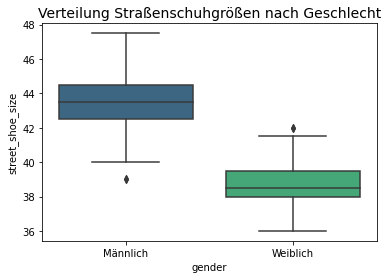

In [94]:
sns.boxplot(x='gender', y='street_shoe_size', data=df_survey, palette='viridis')
plt.title("Verteilung Straßenschuhgrößen nach Geschlecht", fontsize=14)
plt.show()

In [95]:
df_survey['foot_deform'].value_counts()

Nein                                                        92
Hallux Valgus                                               13
Senkfuß                                                     12
Spreizfuß                                                   11
Nein, Spreizfuß                                              5
Plattfuß                                                     5
Nein, Knickfuß                                               4
Hallux Valgus, Senkfuß                                       4
Hallux Valgus, Plattfuß                                      4
Knickfuß                                                     4
Plattfuß, Spreizfuß                                          3
Senkfuß, Spreizfuß                                           3
Hallux Valgus, Hohlfuß                                       2
Nein, Hallux Valgus, Senkfuß                                 2
Nein, Hallux Valgus                                          2
Fersenbein                                             

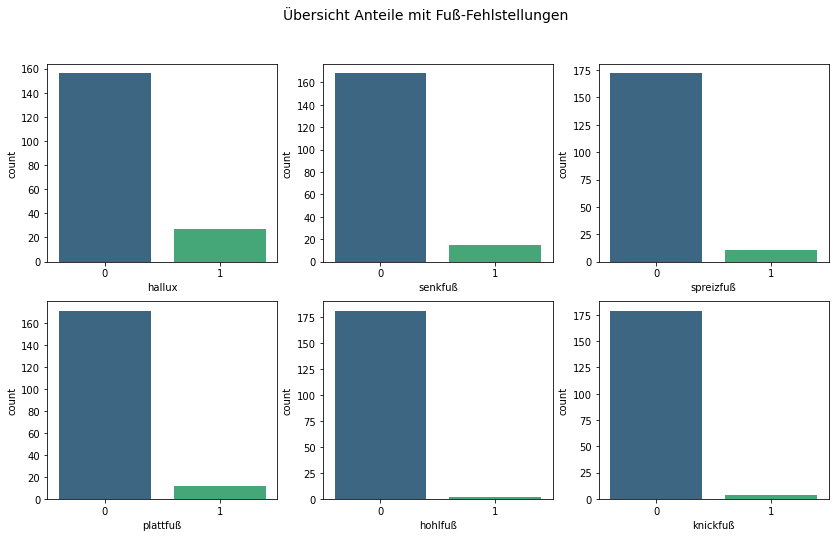

In [96]:
deformations = ['Hallux Valgus', 'Senkfuß','Spreizfuß','Plattfuß', 'Hohlfuß','Knickfuß']

for deform in deformations:
    df_survey[deform.lower().split()[0]] = df_survey.apply(lambda row: 1 if deform.strip() in row.foot_deform.split(',') else 0, axis=1)
    
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle('Übersicht Anteile mit Fuß-Fehlstellungen', fontsize=14)
sns.countplot(x='hallux',data=df_survey,palette='viridis', ax=axs[0,0])
sns.countplot(x='senkfuß',data=df_survey,palette='viridis',ax=axs[0,1])
sns.countplot(x='spreizfuß',data=df_survey,palette='viridis',ax=axs[0,2])
sns.countplot(x='plattfuß',data=df_survey,palette='viridis',ax=axs[1,0])
sns.countplot(x='hohlfuß',data=df_survey,palette='viridis',ax=axs[1,1])
sns.countplot(x='knickfuß',data=df_survey,palette='viridis',ax=axs[1,2])

plt.show()

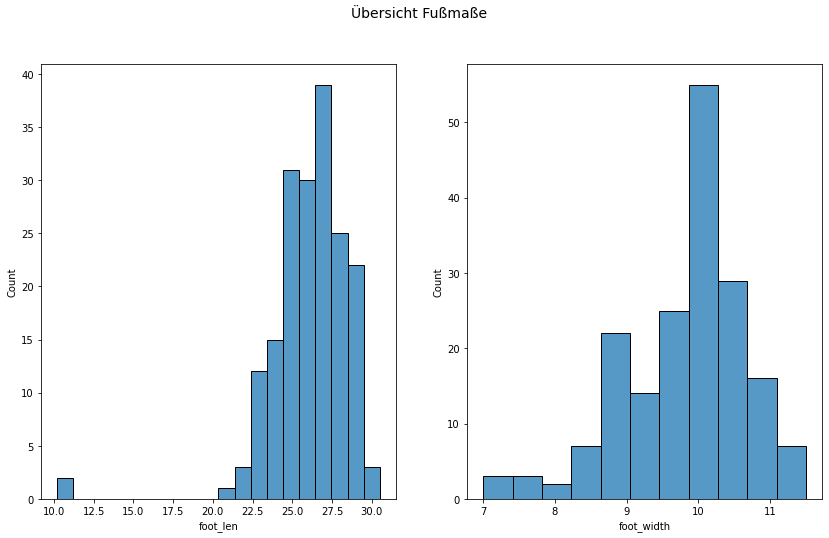

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Übersicht Fußmaße', fontsize=14)
sns.histplot(x='foot_len',data=df_survey,palette='viridis', ax=axs[0])
sns.histplot(x='foot_width',data=df_survey,palette='viridis',ax=axs[1])
plt.show()

In [98]:
df_survey['foot_type'].value_counts()

Ägyptischer Fußtyp               91
Römischer Fußtyp                 52
Griechischer Fußtyp              38
Mix aus Römisch und Ägyptisch     2
Name: foot_type, dtype: int64

In [99]:
df_survey['foot_type'] = df_survey.apply(lambda row: 'Ägyptischer Fußtyp' if row.foot_type == 'Mix aus Römisch und Ägyptisch' else row.foot_type, axis=1)
df_survey['foot_type'].value_counts()

Ägyptischer Fußtyp     93
Römischer Fußtyp       52
Griechischer Fußtyp    38
Name: foot_type, dtype: int64

In [100]:
foot_fam = ['Ägyptischer Fußtyp', 'Römischer Fußtyp','Griechischer Fußtyp']

for foot in foot_fam:
    df_survey[foot.lower().split()[0]] = df_survey.apply(lambda row: 1 if foot in row.foot_type.split(',') else 0, axis=1)

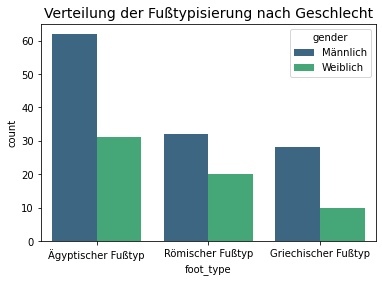

In [101]:
sns.countplot(x='foot_type', data=df_survey, hue='gender', palette='viridis')
plt.title("Verteilung der Fußtypisierung nach Geschlecht", fontsize=14)
plt.show()

Die ägyptische Fußform ist für beide Geschlechter mit Abstand am meisten vertreten, anschließend folgt der römische und der griechische Fußtyp. Letzterer kommt bei Männern auffallend häufiger vor als bei Frauen. Die Erwartung ist, dass insbesondere der Fußtyp die Kletterschuhgröße signifikant beeinflußt. Daher ist eine Korellationsbetrachtung dieses Merkmals besonders interessant.

In [102]:
df_survey.corrwith(df_survey['climb_shoe_size']).sort_values(ascending=False)[1:]

street_shoe_size    0.874610
height              0.836933
weight              0.733277
foot_len            0.623050
foot_width          0.453526
climbing_exp        0.390537
age                 0.307460
rate_comfort        0.213981
griechischer        0.171700
shoe_age            0.110088
rate_fit            0.098757
plattfuß            0.095345
spreizfuß           0.087595
overall_rating      0.082613
knickfuß            0.046166
römischer           0.042996
rate_stiffness      0.031030
hohlfuß             0.027640
senkfuß             0.001786
use_frequency      -0.002447
hallux             -0.122518
ägyptischer        -0.178098
dtype: float64

Bei der Betrachtung von Korellationen mit der Kletterschuhgröße scheinen insbesondere Straßenschuhgröße, Körpergröße und Gewicht eine besondere Rolle zu spielen. Weitere relevante Merkmale sind das Fußmaß, gemessen in Länge und Breite. Überraschend ist eine relativ hohe Korellation mit der Klettererfahrung. Der griechische Fußtyp trat in der Umfrage weitaus seltener auf als der äyptische, dennoch besitzt er eine signifikant höhere Korellation mit der Schuhgröße als die beiden anderen Fußtypen. Eine Erklärung könnte der deutlich längere Mittelzehknochen dieser Fußfamilie liefern. Dieser übertrifft die Länge aller restlichen Zehen, wodurch die betroffenen Personen meistens zu einer größeren Schuhnummer greifen müssen. 

## Analyse der Kletterschuhe

In [103]:
df_survey['shoe_brand'].value_counts()[:10]

La Sportiva    74
Scarpa         45
Ocun           17
Red Chili      12
Five Ten        8
Evolv           7
Tenaya          7
Lowa            3
Mad Rock        3
Simond          2
Name: shoe_brand, dtype: int64

In der Betrachtung der 10 am häufigsten vorkommenden Marken innerhalb der Umfrage ist La Sportiva mit 74 Schuhen rund 40\% öfter vertreten als Scarpa mit 45 Schuhen. Ocun ist mit 17 Vorkommnissen auf Platz 3.

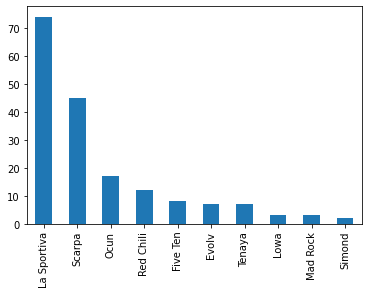

In [104]:
most_common_brands = df_survey['shoe_brand'].value_counts()[:10]
most_common_brands.plot.bar()
plt.show()

In [105]:
df_survey['shoe_model'].nunique()

72

In [106]:
df_survey['shoe_model'].value_counts()[:25]

Sonstige                        16
La Sportiva - SKWAMA            13
Scarpa - VAPOR V                 9
La Sportiva - MYTHOS             7
La Sportiva - OTAKI              7
Ocun - OZONE QC                  7
Red Chili - SPIRIT VCR           6
La Sportiva - SOLUTION           5
Scarpa - DRAGO                   5
Five Ten - HIANGLE               5
La Sportiva - THEORY             4
La Sportiva - KATANA WOMAN       4
Scarpa - INSTINCT VS WMN         4
Scarpa - INSTINCT VSR            4
La Sportiva - SOLUTION WOMAN     4
Scarpa - INSTINCT VS             4
La Sportiva - SOLUTION COMP      3
Scarpa - VAPOR V WMN             3
La Sportiva - MYTHOS ECO         3
Scarpa - VAPOR                   3
La Sportiva - MIURA              3
Tenaya - OASI                    3
Scarpa - FURIA S                 2
Ocun - OXI S                     2
La Sportiva - FINALE VS          2
Name: shoe_model, dtype: int64

Der beliebteste Kletterschuh war der La Sportiva - SKWAMA mit 13 Vorkommnissen innerhalb der Umfrage, gefolgt vom Vapor V der Marke Scarpa mit 9. 16 Personen gaben \enquote{Sonstige} an, was auf fehlende Modelle innerhalb der festgelegten Auswahlliste hindeutet. Da sich dieses Ergebnis bereits früher abzeichnete, wurde ein optionales Freitext-Feld \enquote{Modell nicht in der Liste?} hinterlegt, um den Befragten die Möglichkeit zu geben trotzdem ihr Modell eintragen zu können. Hierdurch wird klarer, welche Modelle sonst noch verwendet werden, die bei der Vorbereitung des Fragebogens und der Marktrecherche nicht im Fokus standen.

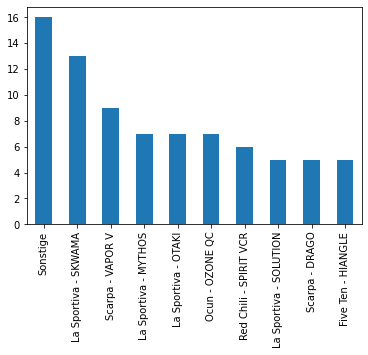

In [107]:
most_common_models = df_survey['shoe_model'].value_counts()[:10]
most_common_models.plot.bar()
plt.show()

In [108]:
df_survey[['shoe_brand', 'shoe_model', 'shoe_model_manual']][df_survey['shoe_model'] == 'Sonstige']

,shoe_brand,shoe_model,shoe_model_manual
18,Bouldrini,Sonstige,NaN
27,Mad Rock,Sonstige,NaN
31,Evolv,Sonstige,NaN
54,Scarpa,Sonstige,NaN
55,?,Sonstige,NaN
61,Five Ten,Sonstige,Diamond (ca. 22 Jahre alt :)
77,Boreal,Sonstige,Satori
86,Evolv,Sonstige,Evolve Shaman 2
88,Evolv,Sonstige,Evolve Shaman 2
103,La Sportiva,Sonstige,Millet Easy up


Neben Einzelfällen wie dem Modell Satori der Marke Boreal oder AMP von Red Chili ist das Modell Shaman 2 von Evolv vier Mal aufgetreten. Das könnte darauf zurückzuführen sein, dass der Schuh in der Vergangenheit weit verbreitet war und der Hersteller ihn nicht mehr im Produktportfolio führt. Es scheint sich dennoch um einen Favoriten zu handeln, weshalb dieses Modell das Merkmal \enquote{Sonstige} ersetzen wird, um diese Klasse bei der späteren Modellvorhersage nutzen zu können. Es werden ebenfalls alle manuell eingegebenen Modelle übernommen, um die Informationen später nutzen zu können. Auch wenn diese Modelle nur selten vorkommen, ist dies potentiell eine besserer Vorschlag als nur \enquote{Sonstige} zu empfehlen.

In [109]:
df_survey.drop(index=55,inplace=True)

df_survey.at[61,'shoe_model'] = 'Five Ten - DIAMOND'
df_survey.at[77,'shoe_model'] = 'Boreal - SATORI'

df_survey.at[31,'shoe_model'] = 'Evolv - SHAMAN 2'
df_survey.at[86,'shoe_model'] = 'Evolv - SHAMAN 2'
df_survey.at[88,'shoe_model'] = 'Evolv - SHAMAN 2'
df_survey.at[103,'shoe_model'] = 'La Sportiva - MILLET EASY UP'
df_survey.at[140,'shoe_model'] = 'Red Chili - AMP'
df_survey.at[154,'shoe_model'] = 'Evolv - SHAMAN 2'
df_survey.at[155,'shoe_model'] = 'Evolv - SHAMAN 2'

df_survey[['shoe_brand','shoe_model']][df_survey['shoe_model']  == 'Sonstige']

,shoe_brand,shoe_model
18,Bouldrini,Sonstige
27,Mad Rock,Sonstige
54,Scarpa,Sonstige
113,Scarpa,Sonstige
129,Red Chili,Sonstige
134,La Sportiva,Sonstige


Nach der Übernahme bleiben noch die Beobachtungen übrig ohne weitere Informationen. Die Daten zur Person sind trotzdem wertvoll, insbesondere da es sich nur um eine kleine Stichprobenmenge handelt. Deshalb sollte keine Beobachtung ohne Weiteres gelöscht werden. Ein Lösungsansatz ist das Imputation Verfahren, welches zur Bereinigung fehlender Werte genutzt wird. Bei numerischen Werten kann beispielsweise der allgemeine Durchschnitt der Spalte berechnet werden, welcher dann in alle Beobachtungen mit fehlendem Wert eingetragen wird. So könnte in diesem Fall der am häufigsten vorkommende Schuh jeder Marke ermittelt werden, welcher dann jeweils die Ausprägung \enquote{Sonstige} ersetzt.

In [112]:
# Ermittle das häufigste Schuhmodell einer Marke
most_common_models = {}
    
for i in df_survey.groupby(['shoe_brand', 'shoe_model'])['shoe_model'].count().sort_values().groupby(level=0).tail(1).index:
    most_common_models.update({i[0]:i[1]})
    
most_common_models

{'Black Diamond': 'Black Diamond - ASPECT',
 'Simond': 'Simond - ROCK+',
 'So iLL': 'So iLL - ZERO PRO',
 'Boreal': 'Boreal - SATORI',
 'Bouldrini': 'Sonstige',
 'Mad Rock': 'Mad Rock - SHARK 2.0',
 'Lowa': 'Lowa - FALCO VCR',
 'Tenaya': 'Tenaya - OASI',
 'Evolv': 'Evolv - SHAMAN 2',
 'Five Ten': 'Five Ten - HIANGLE',
 'Red Chili': 'Red Chili - SPIRIT VCR',
 'Ocun': 'Ocun - OZONE QC',
 'Scarpa': 'Scarpa - VAPOR V',
 'La Sportiva': 'La Sportiva - SKWAMA'}

In [114]:
for i in df_survey['shoe_brand'][df_survey['shoe_model'] == 'Sonstige'].index:
    df_survey.at[i,'shoe_model'] = most_common_models[df_survey['shoe_brand'].iloc[i]]
df_survey[['shoe_brand','shoe_model']][df_survey['shoe_model']  == 'Sonstige']

,shoe_brand,shoe_model
18,Bouldrini,Sonstige


Nachdem nun alle möglichen Substitutionen vorgenommen wurden, bleibt nur noch eine  Beobachtung übrig der Marke Bouldrini, welche gar keine Alternative zulässt.
Für den Fall, dass die Marke für einen speziellen Fußtyp relevant sein könnte, wird in diesem Fall nur die Schuhmarke vorgeschlagen.

In [117]:
df_survey.at[18,'shoe_model'] = df_survey.at[18,'shoe_brand']
df_survey[['shoe_brand','shoe_model']][df_survey['shoe_model']  == 'Sonstige']

,shoe_brand,shoe_model


In [118]:
df_survey['shoe_model'].value_counts()[:25]

La Sportiva - SKWAMA            13
Scarpa - VAPOR V                11
La Sportiva - MYTHOS             7
Red Chili - SPIRIT VCR           7
Ocun - OZONE QC                  7
La Sportiva - OTAKI              7
Five Ten - HIANGLE               6
La Sportiva - SOLUTION           5
Scarpa - DRAGO                   5
Evolv - SHAMAN 2                 5
La Sportiva - THEORY             4
Scarpa - INSTINCT VS WMN         4
La Sportiva - KATANA WOMAN       4
Scarpa - INSTINCT VSR            4
La Sportiva - SOLUTION WOMAN     4
Scarpa - INSTINCT VS             4
La Sportiva - SOLUTION COMP      3
Scarpa - VAPOR V WMN             3
Scarpa - VAPOR                   3
Mad Rock - SHARK 2.0             3
La Sportiva - MIURA              3
Tenaya - OASI                    3
La Sportiva - MYTHOS ECO         3
Lowa - FALCO VCR                 2
Ocun - OXI S                     2
Name: shoe_model, dtype: int64

Alle Beobachtungen mit dem Schuhmodell \enquote{Sonstige} konnten behandelt werden. Eine Klassifikation mit dem Modell als Zielvariable wird nun im Idealfall immer einen Schuh vorhersagen können. Als nächstes ist die Betrachtung der Schuhgröße relevant, um daraus die optimale Größe ableiten zu können. Hierfür wird zunächst die globale Statistik des Datensatzes betrachtet für Straßenschuhe sowie Kletterschuhe.

In [119]:
df_survey[['street_shoe_size','climb_shoe_size']].describe()

,street_shoe_size,climb_shoe_size
count,182.000000,182.000000
mean,42.013736,40.793516
std,2.814932,2.735859
min,36.000000,29.000000
25%,39.500000,38.500000
50%,42.500000,41.000000
75%,44.000000,43.000000
max,47.500000,46.000000


Im gesamten Datensatz ist die durchschnittliche Größe von Straßenschuhen ca. 1,2 Nummern größer als die der Kletterschuh. Interessant wäre die Verteilung unter den Schuhmodellen zu betrachten.

In [120]:
df_mean = df_survey.groupby('shoe_model')[['street_shoe_size','climb_shoe_size']].mean()
df_count = df_survey.groupby('shoe_model')[['street_shoe_size','climb_shoe_size']].count()
df_merge = pd.merge(df_mean, df_count, on='shoe_model')
df_merge.reset_index(inplace=True)

df_mean_shoesize_per_model = pd.DataFrame()
df_mean_shoesize_per_model['shoe_model'] = df_merge['shoe_model']
df_mean_shoesize_per_model['street_shoe_size'] = df_merge['street_shoe_size_x']
df_mean_shoesize_per_model['climb_shoe_size'] = df_merge['climb_shoe_size_x']
df_mean_shoesize_per_model['delta'] = df_merge['climb_shoe_size_x'] - df_merge['street_shoe_size_x']
df_mean_shoesize_per_model['count'] = df_merge['street_shoe_size_y']
df_mean_shoesize_per_model.head(1)

,shoe_model,street_shoe_size,climb_shoe_size,delta,count
0,Black Diamond - ASPECT,39.0,40.0,1.0,1


In [175]:
df_top10 = df_mean_shoesize_per_model.sort_values(by='count', ascending=False)[:10]
df_top10

,shoe_model,street_shoe_size,climb_shoe_size,delta,count
25,La Sportiva - SKWAMA,43.307692,40.692308,-2.615385,13
66,Scarpa - VAPOR V,42.863636,41.863636,-1.000000,11
45,Ocun - OZONE QC,43.785714,43.500000,-0.285714,7
53,Red Chili - SPIRIT VCR,43.285714,42.285714,-1.000000,7
23,La Sportiva - OTAKI,43.642857,41.857143,-1.785714,7
21,La Sportiva - MYTHOS,44.000000,42.071429,-1.928571,7
9,Five Ten - HIANGLE,42.666667,42.195000,-0.471667,6
26,La Sportiva - SOLUTION,42.400000,40.100000,-2.300000,5
5,Evolv - SHAMAN 2,43.400000,43.700000,0.300000,5
57,Scarpa - DRAGO,40.400000,38.800000,-1.600000,5


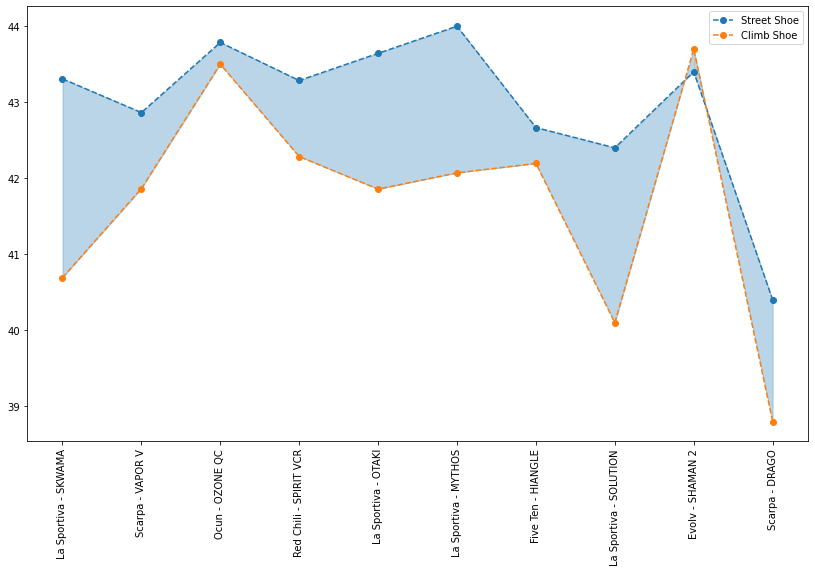

In [176]:
plt.figure(figsize=(14,8))
x = df_top10['shoe_model']
y1 = df_top10['street_shoe_size']
y2 = df_top10['climb_shoe_size']
plt.plot(x,y1 , 'o--')
plt.plot(x,y2 , 'o--')
plt.fill_between(x, y1, y2, color='C0', alpha=0.3)
plt.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)

plt.legend(['Street Shoe', 'Climb Shoe'])
plt.xticks(rotation=90)
plt.show()

Die Darstellung zeigt die 10 am häufigsten genannten Kletterschuhe. Es sind deutliche Unterschiede zwischen den Straßenschuhgrößen und Kletterschuhgrößen zu erkennen. Letztere fallen inder Regel kleiner aus, wobei nicht bei jedem Modell exakt die gleiche Differenz zu finden ist. Demnach wird ein La Sportiva SKWAMA meistens ca. 2,5 Größen kleiner getragen, während ein VAPOR V von Scarpa nur eine Größe kleiner ausfällt.

# Preprocessing

Für die bessere Visualisierung wurden die Fußtypen als auch die Fehlstellungen in sogenannte Dummy Variablen konvertiert, sodass jedes Merkmal eine eigene Spalte besitzt und durch einen binären code anzeigen kann, ob das Merkmal für eine Beobachtung vorhanden ist oder nicht. Daher können die ursprünglichen Spalten entfernt werden, so wie die Zielvariable \enquote{Schuhmodell}, da diese vorhergesagt werden soll.

In [179]:
df_survey.columns

Index(['timestamp', 'street_shoe_size', 'fav_sneaker_model', 'foot_len',
       'foot_width', 'foot_type', 'foot_deform', 'shoe_brand', 'shoe_model',
       'shoe_model_manual', 'climb_shoe_size', 'shoe_age', 'favourite',
       'vorspann', 'downturn', 'asymetry', 'closure_type', 'climb_style',
       'terrain', 'rate_fit', 'rate_comfort', 'rate_stiffness',
       'use_frequency', 'climbed_grade', 'overall_rating', 'gender', 'height',
       'weight', 'age', 'climbing_exp', 'hallux', 'senkfuß', 'spreizfuß',
       'plattfuß', 'hohlfuß', 'knickfuß', 'ägyptischer', 'römischer',
       'griechischer'],
      dtype='object')

In [184]:
df_prep = df_survey.drop(['timestamp','foot_deform','foot_type','fav_sneaker_model', 'shoe_brand', 'shoe_model',
       'shoe_model_manual', 'climb_shoe_size', 'shoe_age', 'favourite',
       'vorspann', 'downturn', 'asymetry', 'closure_type','rate_fit', 'rate_comfort', 'rate_stiffness',
       'use_frequency', 'climbed_grade', 'overall_rating'], axis=1)
df_prep.head(1)

,street_shoe_size,foot_len,foot_width,climb_style,terrain,gender,height,weight,age,climbing_exp,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer
0,41.5,25.5,10.0,"Sportklettern, Bouldern",Beides,Männlich,168,61,29,4.0,0,0,0,0,0,0,1,0,0


## Fehlende Werte

In [185]:
df_prep.isnull().sum()

street_shoe_size    0
foot_len            0
foot_width          0
climb_style         0
terrain             0
gender              0
height              0
weight              0
age                 0
climbing_exp        0
hallux              0
senkfuß             0
spreizfuß           0
plattfuß            0
hohlfuß             0
knickfuß            0
ägyptischer         0
römischer           0
griechischer        0
dtype: int64

## Ausreißer

In [187]:
df_prep.select_dtypes(['int64','float64']).columns

Index(['street_shoe_size', 'foot_len', 'foot_width', 'height', 'weight', 'age',
       'climbing_exp', 'hallux', 'senkfuß', 'spreizfuß', 'plattfuß', 'hohlfuß',
       'knickfuß', 'ägyptischer', 'römischer', 'griechischer'],
      dtype='object')

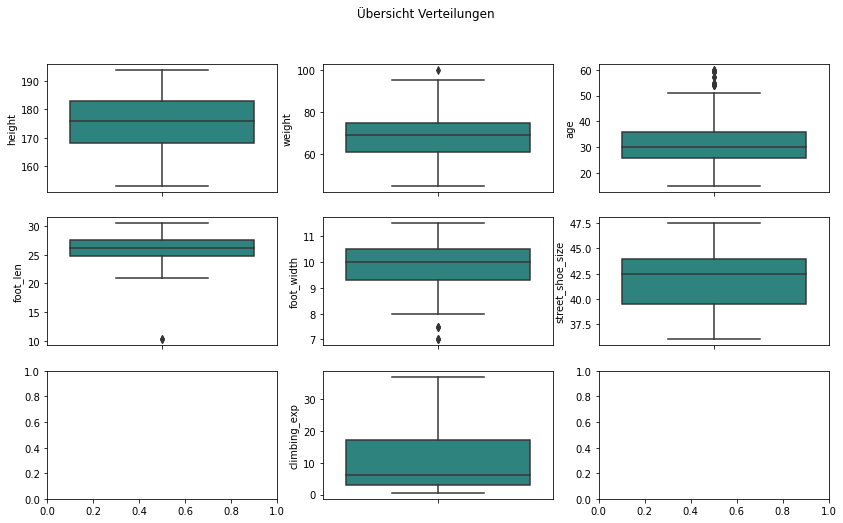

In [190]:
fig, axs = plt.subplots(3, 3, figsize=(14, 8))
fig.suptitle('Übersicht Verteilungen')
sns.boxplot(y='height',data=df_prep,palette='viridis',ax=axs[0,0])
sns.boxplot(y='weight',data=df_prep,palette='viridis',ax=axs[0,1])
sns.boxplot(y='age',data=df_prep,palette='viridis',ax=axs[0,2])
sns.boxplot(y='foot_len',data=df_prep,palette='viridis',ax=axs[1,0])
sns.boxplot(y='foot_width',data=df_prep,palette='viridis',ax=axs[1,1])
sns.boxplot(y='street_shoe_size',data=df_prep,palette='viridis', ax=axs[1,2])
sns.boxplot(y='climbing_exp',data=df_prep,palette='viridis', ax=axs[2,1])

plt.show()

In [191]:
df_prep[df_prep['foot_len'] < 20]

,street_shoe_size,foot_len,foot_width,climb_style,terrain,gender,height,weight,age,climbing_exp,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer
68,39.5,10.2,9.5,"Sportklettern, Bouldern, Mehrseillängen",Beides,Weiblich,167,62,24,3.0,0,0,0,0,0,0,0,1,0
145,39.5,10.2,9.5,"Sportklettern, Bouldern",Beides,Weiblich,167,62,24,3.0,0,0,0,0,0,0,0,1,0


In [193]:
df_prep.at[68,'foot_len'] = round(df_prep['foot_len'].mean(),2)
df_prep.at[145,'foot_len'] = round(df_prep['foot_len'].mean(),2)
df_prep['foot_len'].iloc[[68,145]]

69     27.0
146    24.0
Name: foot_len, dtype: float64

In [194]:
df_prep[df_prep['foot_width'] < 8]

,street_shoe_size,foot_len,foot_width,climb_style,terrain,gender,height,weight,age,climbing_exp,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer
26,42.0,22.0,7.0,Bouldern,Halle,Männlich,173,55,15,3.0,0,0,1,0,0,0,0,0,1
43,38.0,23.5,7.5,"Sportklettern, Bouldern",Beides,Weiblich,162,57,25,7.0,0,1,0,0,0,0,1,0,0
100,44.0,27.0,7.0,"Sportklettern, Bouldern",Beides,Männlich,179,81,31,2.0,0,1,0,0,0,0,1,0,0
132,38.0,23.5,7.5,"Sportklettern, Bouldern",Beides,Weiblich,162,57,25,7.0,0,1,0,0,0,0,1,0,0
160,44.0,27.0,7.0,"Sportklettern, Bouldern",Halle,Männlich,179,81,31,2.0,0,1,0,0,0,0,1,0,0
169,38.0,23.5,7.5,"Sportklettern, Bouldern",Beides,Weiblich,162,57,25,7.0,0,1,0,0,0,0,1,0,0


## Kategorien / Ordinalwerte in Zahlen wandeln

In [195]:
df_prep.select_dtypes(['object']).columns

Index(['climb_style', 'terrain', 'gender'], dtype='object')

In [197]:
def strip_list(liste):
    stripped = []
    
    for n in liste:
        stripped.append(n.strip())
    
    return stripped

styles = ['Sportklettern', 'Bouldern', 'Mehrseillängen']
for style in styles:
    df_prep[style.lower().split()[0]] = df_prep.apply(lambda row: 1 if style in strip_list(row.climb_style.split(',')) else 0, axis=1)

df_prep.drop('climb_style',axis=1,inplace=True)
df_prep.head(1)

,street_shoe_size,foot_len,foot_width,terrain,gender,height,weight,age,climbing_exp,hallux,...,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer,sportklettern,bouldern,mehrseillängen
0,41.5,25.5,10.0,Beides,Männlich,168,61,29,4.0,0,...,0,0,0,0,1,0,0,1,1,0


In [199]:
df_prep['terrain'].unique()

array(['Beides', 'Halle', 'Outdoor'], dtype=object)

In [200]:
df_prep['halle'] = df_prep['terrain'].map(lambda row: 1 if row in ['Halle', 'Beides'] else 0)
df_prep['outdoor'] = df_prep['terrain'].map(lambda row: 1 if row in ['Outdoor', 'Beides'] else 0)

df_prep.drop('terrain',axis=1,inplace=True)
df_prep.head(1)

,street_shoe_size,foot_len,foot_width,gender,height,weight,age,climbing_exp,hallux,senkfuß,...,hohlfuß,knickfuß,ägyptischer,römischer,griechischer,sportklettern,bouldern,mehrseillängen,halle,outdoor
0,41.5,25.5,10.0,Männlich,168,61,29,4.0,0,0,...,0,0,1,0,0,1,1,0,1,1


In [202]:
df_prep = pd.get_dummies(data=df_prep, columns=['gender'],drop_first=True)
df_prep

,street_shoe_size,foot_len,foot_width,height,weight,age,climbing_exp,hallux,senkfuß,spreizfuß,...,knickfuß,ägyptischer,römischer,griechischer,sportklettern,bouldern,mehrseillängen,halle,outdoor,gender_Weiblich
0,41.5,25.5,10.0,168,61,29,4.0,0,0,0,...,0,1,0,0,1,1,0,1,1,0
1,38.5,24.2,9.8,168,63,30,3.0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
2,46.0,29.0,10.0,186,72,36,30.0,0,0,0,...,0,0,0,1,1,1,0,1,1,0
3,46.0,29.0,10.0,186,72,36,30.0,0,0,0,...,0,0,0,1,1,1,0,1,1,0
4,42.0,27.0,10.0,178,67,33,3.0,1,0,0,...,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,46.0,29.0,10.0,186,72,36,30.0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
179,43.0,26.5,10.5,183,68,26,10.0,1,0,0,...,0,0,0,1,1,1,0,1,1,0
180,44.0,27.0,10.0,185,75,33,5.0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
181,42.5,26.7,9.9,175,70,27,6.0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


In [203]:
df_prep.select_dtypes(['object']).columns

Index([], dtype='object')

In [206]:
df_prep.shape

(182, 22)

In [207]:
df_survey.shape

(182, 39)

# Modellbau - Schuhmodell Klassifikation

Im ersten Schritt soll mithilfe der Fuß- und Körpereigenschaften eine Vorhersage des Schuhmodells möglich sein. Dazu wird das K-Nearest-Neighbor Verfahren angewendet.

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [226]:
X = df_prep
y= df_survey['shoe_model']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=61, n_jobs=-1)

knn.fit(scaled_X,y_train)
model_predictions = knn.predict(X_test)

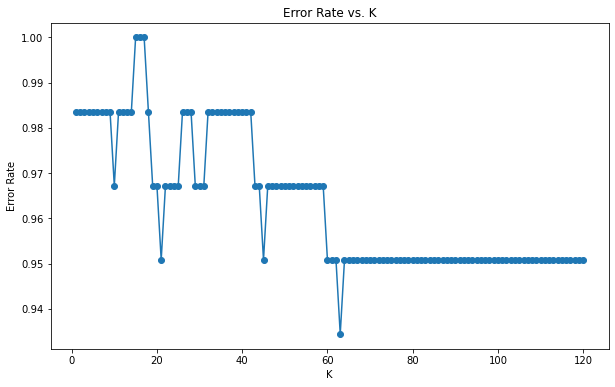

In [225]:
error_rate = []

k_max = 121

for i in range(1,k_max):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(scaled_X,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))

plt.plot(range(1,k_max), error_rate, marker='o')
plt.title('Error Rate vs. K')
plt.ylabel('Error Rate')
plt.xlabel('K')
plt.show()

In [227]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,model_predictions))

                               precision    recall  f1-score   support

            Evolv - DEFY LACE       0.00      0.00      0.00         1
             Evolv - SHAMAN 2       0.00      0.00      0.00         2
           Five Ten - HIANGLE       0.00      0.00      0.00         1
          La Sportiva - COBRA       0.00      0.00      0.00         1
      La Sportiva - FINALE VS       0.00      0.00      0.00         1
   La Sportiva - FINALE WOMAN       0.00      0.00      0.00         1
   La Sportiva - KATANA LACES       0.00      0.00      0.00         1
   La Sportiva - KATANA WOMAN       0.00      0.00      0.00         1
         La Sportiva - MYTHOS       0.00      0.00      0.00         3
     La Sportiva - MYTHOS ECO       0.00      0.00      0.00         2
          La Sportiva - OTAKI       0.00      0.00      0.00         2
         La Sportiva - PYTHON       0.00      0.00      0.00         1
         La Sportiva - SKWAMA       0.05      1.00      0.09         3
     

C:\Users\steff\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
